## White Wine Review

In [1]:
#import all libraries

import numpy as np
import pandas as pd

from IPython.display import display, HTML, SVG, Image, IFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from yellowbrick.features import rank2d

In [2]:
# import csv for red
# https://stackoverflow.com/questions/24606330/how-to-read-a-file-with-a-semi-colon-separator-in-pandas
white_wines = pd.read_csv("winequality-white.csv", sep=";")
white_wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# Create Target Column based on quality rating of 5 or lower = bad (0) and 6 or higher = good (1)
white_wines['target'] = np.where(white_wines['quality']<=5,0,1)

In [4]:
white_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [5]:
# Assign X & y

X = white_wines.drop(["quality",'target'], axis=1)
y= white_wines.target

In [6]:
# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler= StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Train the Model

In [8]:
classifier = LogisticRegression()
classifier.fit(X_train_scaled, y_train)
predictions = classifier.predict(X_test_scaled)
print(predictions)
print(classifier.classes_)

[1 1 1 ... 1 1 1]
[0 1]


In [9]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.7541519194119248
Testing Data Score: 0.7453061224489796


In [10]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       397
           1       0.78      0.86      0.82       828

    accuracy                           0.75      1225
   macro avg       0.71      0.68      0.69      1225
weighted avg       0.73      0.75      0.74      1225



In [11]:
from sklearn.metrics import plot_confusion_matrix

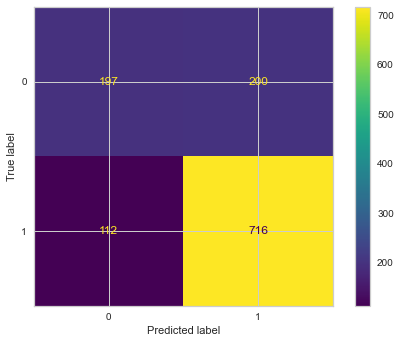

In [12]:
plot_confusion_matrix(classifier, X_test_scaled, y_test)

## Hyper Parameter Tuning

In [13]:
param_grid = {'C': [.01, 1, 10, 100, 250],
               'max_iter': [10,50,100,200,250,400],
               'penalty': ['elasticnet', 'l1', 'l2','none'],
               'dual': [True, False],
               'fit_intercept': [True, False],
               'class_weight': ['dict', 'balanced']
             }
grid = GridSearchCV(classifier, param_grid, verbose=3,)

In [14]:
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, m

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=True, max_it

[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_i

[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=True, fit_intercept

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l1 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.760, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.747, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.760, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.747, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[C

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.760, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.747, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.760, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.747, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.755, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.760, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.747, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_wei

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.706, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.691, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.683, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.706, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.681, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.683, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk


[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.684, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.701, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.703, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.707, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.702, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.684, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.701, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.707, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.702, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.684, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.701, total=   0.0s
[CV] C=0.01, class_weight=dict, dual=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=T

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalt

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balance

[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elastic

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.716, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.725, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.710, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.718, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.727, total=   0.0s
[CV] C=0.01, class_

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.716, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.724, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.710, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=l2, score=0.718, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.722, total=   0.0s
[CV] C=0.01, class_

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.733, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.714, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, s

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.722, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.725, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.733, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.714, total=   0

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.714, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=ela

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.725, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.733, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.714, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.688, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.706, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.698, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.687, total=   0.0

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.707, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.702, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.680, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.688, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.702, total=   0.0s
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, ma

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.688, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.685, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, pe

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk


[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.686, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.707, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.702, total=   0.0s
[CV] C=0

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.688, total=   0.0s
[CV] C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=0.01, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.685, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_w

[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=

[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=True, max_iter=400, penalty=no

[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l1 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2 


C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.755, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.759, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.759, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.757, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.744, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_ite

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.755, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.760, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.747, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_inte

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.759, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.745, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.754, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.755, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, ma

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.765, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.759, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.745, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.754, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.755, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=True, max_iter

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.703, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.706, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.681, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.683, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_in

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.703, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.706, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.681, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.683, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.703, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.706, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.681, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.683, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=dict, dual=False,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.681, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.684, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.701, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.703, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.706, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=F

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.706, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.681, total=   0.0s
[CV] C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.683, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=bal

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dua

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=True, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=Tr

[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=True, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.728, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.720, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.725, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.700, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.711, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_i

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.725, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.722, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fi

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.725, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.733, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.698, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.714, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, cla

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=l2, score=0.714, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.722, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.725, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.733, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.698, total=   0.0s
[CV] C=1, class_weight=ba

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.696, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.714, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.722, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.725, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.733, total=   0.0s
[CV] C=1, class_weight=balanc

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.697, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.706, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fi

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=1, c

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.702, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.705, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.697, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.688, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.685, total=   0.0s
[CV] C=1, clas

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.685, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.702, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.705, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.697, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.688, total=   0.0s
[CV] C=1, class_

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.697, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.688, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.685, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.702, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.705, total=   0.0s
[CV] C=1, class_weight=b

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.705, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.697, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.688, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.685, total=   0.0s
[CV] C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=1, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.702, total=   0.0s
[CV] C=1, class_weight=balan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=10

[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 


[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=l2 


[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=True, fit_intercept=False, max_iter=400, pe

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.757, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.744, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.760, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.747, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.755, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.760, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.747, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.754, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.755, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.760, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.747, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_inte

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.760, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.747, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.754, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.755, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.705, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.706, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.691, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.683, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.701, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, m

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number


[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.681, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.684, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.701, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.703, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.706, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.701, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.703, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.706, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.681, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.683, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.706, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.681, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.683, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weig

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.701, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.703, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.706, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.681, total=   0.0s
[CV] C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=10, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.683, total=   0.0s
[CV] C=10, class_weight=dict, dual=False,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=l2, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=none, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True,

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_in

[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elastic

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.710, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=na

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.725, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.733, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.698, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.714, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\jfors\anaco

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.713, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.722, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.725, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.733, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.698, total=   0.0s
[CV] C=10, class

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.722, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.725, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.733, total=   0.0s
[CV] C=10, class_weight=balanced, du

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.698, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.714, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.722, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.725, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.733, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.698, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.714, total=   0.0s
[CV] C=10, cla

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[C

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=10, class_w

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.688, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.685, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, sco

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.705, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.697, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.688, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.685, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.702, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.705, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.697, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.688, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.685, total=   0.0s
[CV] 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.698, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.688, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.685, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.702, total=   0.0s
[CV] C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=10, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.705, total=   0.0s
[CV] C=10, clas

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=l2 


[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=True, max_iter=200, pe

[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_in

[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=True, fit_intercept=False, max_iter=250, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=True, fit_intercept=False, max_it

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.757, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.744, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_we

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.762, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.760, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.747, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=d

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.755, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.760, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.747, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.754, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.755, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.762, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.760, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.747, total=   0.0s
[CV] C=100, class_weight=dict, dual=False

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.760, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=l2, score=0.747, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.754, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.755, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.706, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.691, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.683, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.701, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.705, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_inte

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.681, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=l2, score=0.683, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.701, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.703, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.706, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.706, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.681, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.683, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.701, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.703, total=   0.0s
[CV] C=100, class_weight=dict, dual=False,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.703, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.706, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.681, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.683, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.701, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.703, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.706, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.681, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.683, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=25

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_inter

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.681, total=   0.0s
[CV] C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=100, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.683, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0

[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s


[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=10, penalty=l2, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=Tr

[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=True, fit_intercept=False, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.720, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.725, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.699, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.710, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV]

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.725, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.733, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.698, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.714, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=100, class_weight=balanced,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.725, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.733, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.698, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.714, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.722, total=   0.0s
[CV] C=100, class_w

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalt

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.733, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.698, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.714, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.722, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.725, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.733, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.698, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.714, total=   0.0s
[CV] 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.687, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l2, score=0.683, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.698, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.706, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.698, total=   0.0s
[CV] C=100,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.705, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.697, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.688, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=l2, score=0.685, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.702, total=   0.0s
[CV] C=100

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l1 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l1, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.702, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=l2, score=0.705, total=   0.0s
[CV] C=100, class_we

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.685, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, p

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.688, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.685, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=ela

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.697, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.688, total=   0.0s
[CV] C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=100, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.685, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV]

[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=True, max_iter=100, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=True, 

[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=Tr

[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=l2, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=True, fit_intercept=False, max_iter=200, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=True, fit_intercept=F

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.757, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=l2, score=0.744, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.755, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.759, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=10, penalty=none, score=0.759, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.760, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=l2, score=0.747, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.754, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.755, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.762, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.762, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.760, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=l2, score=0.747, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.754, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=200, pen

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=dict

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.747, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=elasticnet, score=nan, total=   0.0s
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.762, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.760, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=True, max_iter=400, penalty=none, score=0.747, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_wei

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.691, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=10, penalty=none, score=0.683, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.706, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.681, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.683, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.706, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.681, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.683, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.703, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.706, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.681, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=200, penalty=none, score=0.683, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weig

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.703, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.706, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.681, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.683, total=   0.0s
[CV] C=250, class_weight=dict, dual=False, fit_intercept=False, max_iter=400, penalty=elasticnet 
[CV]  C=250, class_weight=dict, dual=False, fit_interc

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=10, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_wei

[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=True, max_iter=250, penalty=l1, score=nan, 

[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=100, penalty=l1, sc

[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=True, fit_intercept=False, max_iter=400, penalty=none, score=nan, total=   0.0s
[CV] C=250, cla

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=elastic

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.698, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=50, penalty=none, score=0.714, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=elasticnet, sco

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.733, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.698, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=100, penalty=none, score=0.714, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=elasticnet, score=nan,

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.725, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.733, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.698, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=200, penalty=none, score=0.714, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=elasticnet, score=nan, total=   

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.722, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.725, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.733, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.698, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=True, max_iter=250, penalty=none, score=0.714, total=   0.0s
[CV] 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=10, penalty=l1, score=nan, total=   0.0s
[CV] C=2

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=l1, score=nan, total=   0.0s
[CV] C=250, class_weight=

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.688, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=50, penalty=none, score=0.685, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet, score=nan, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=elasti

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.705, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.697, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.688, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=100, penalty=none, score=0.685, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=200, penalty=elasticnet, score=nan, 

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk


[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.688, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=l2, score=0.685, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.702, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.705, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=250, penalty=none, score=0.697, total=   0.0s
[

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.705, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.697, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.688, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=l2, score=0.685, total=   0.0s
[CV] C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none 
[CV]  C=250, class_weight=balanced, dual=False, fit_intercept=False, max_iter=400, penalty=none, score=0.702, total=   0.0s
[CV] C=250

C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sklearn\linear_model\_logistic.py:1321: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
C:\Users\jfors\anaconda3\envs\PythonAdv\lib\site-packages\sk

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 1, 10, 100, 250],
                         'class_weight': ['dict', 'balanced'],
                         'dual': [True, False], 'fit_intercept': [True, False],
                         'max_iter': [10, 50, 100, 200, 250, 400],
                         'penalty': ['elasticnet', 'l1', 'l2', 'none']},
             verbose=3)

In [15]:
print(grid.best_params_)
print(grid.best_score_)

{'C': 0.01, 'class_weight': 'dict', 'dual': False, 'fit_intercept': True, 'max_iter': 50, 'penalty': 'none'}
0.7555120576841091


In [16]:
# Training Score
grid.score(X_train_scaled, y_train)

0.7549686904437789

In [17]:
# Testing Score
grid.score(X_test_scaled, y_test)

0.7453061224489796

## Testing with top 5 features


Feature: 0, Score: -0.04797
Feature: 1, Score: -0.66827
Feature: 2, Score: -0.00903
Feature: 3, Score: 0.66149
Feature: 4, Score: 0.05509
Feature: 5, Score: 0.19909
Feature: 6, Score: -0.06953
Feature: 7, Score: -0.47659
Feature: 8, Score: 0.12871
Feature: 9, Score: 0.18809
Feature: 10, Score: 1.11202


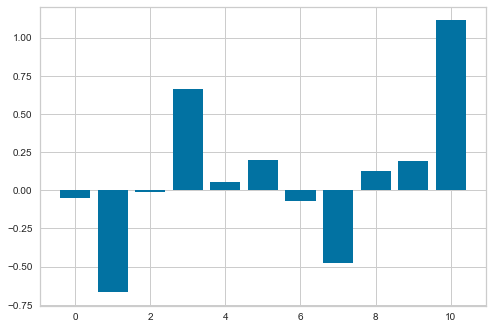

In [18]:
# https://machinelearningmastery.com/calculate-feature-importance-with-python/

from matplotlib import pyplot

# # get importance
importance = classifier.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [19]:
list(white_wines.columns.values)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'target']

In [20]:
# apply with top5 features based on last cell (Alcohol, residual sugar, free sulfur dioxide, suplhates and pH )

X2 = white_wines.drop(["quality",'target','fixed acidity', 'volatile acidity','citric acid','chlorides', 'total sulfur dioxide','density',], axis=1)
y2= white_wines.target

In [21]:
# create train test split
X_train2, X_test2, y_train2, y_tes2t = train_test_split(X2, y2, random_state=42)

In [22]:
# pre-processing (scale data)
# starting with standard scaler and will try minmaxscaler later

X_scaler2= StandardScaler().fit(X_train2)
X_train_scaled2 = X_scaler2.transform(X_train2)
X_test_scaled2 = X_scaler2.transform(X_test2)

In [23]:
classifier2 = LogisticRegression()
classifier2.fit(X_train_scaled2, y_train2)
predictions2 = classifier2.predict(X_test_scaled2)
print(predictions2)
print(classifier2.classes_)

[1 1 1 ... 1 1 1]
[0 1]


In [24]:
print(f"Training Data Score: {classifier2.score(X_train_scaled2, y_train2)}")
print(f"Testing Data Score: {classifier2.score(X_test_scaled2, y_tes2t)}")

Training Data Score: 0.7059624285325347
Testing Data Score: 0.7004081632653061


In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       397
           1       0.78      0.86      0.82       828

    accuracy                           0.75      1225
   macro avg       0.71      0.68      0.69      1225
weighted avg       0.73      0.75      0.74      1225

